## Data Analysis Example

### Problem

Suppose we are giving 2 students a multiple choice exam with 40 questions, where each question has 4 choices. We don't know how much the students have studied for the exam, but we think they will do better than just guessing randomly.

1. What are the parameters of interest?
2. What is our likelihood?
3. What prior should we use?
4. What is the prior probability P($\theta$ > 0.25)? P($\theta$ > 0.5)? P($\theta$ > 0.8)?
5. Suppose the first student gets 33 questions right. What is the posterior distribution for $\theta$<sub>1</sub>? P($\theta$<sub>1</sub> > 0.25)? P($\theta$<sub>1</sub> > 0.5)? P($\theta$<sub>1</sub> > 0.8)? What is a 95% credible interval for $\theta$<sub>1</sub>?
6. Suppose the second student gets 24 questions right. What is the posterior distribution for $\theta$<sub>2</sub>? P($\theta$<sub>2</sub> > 0.25)? P($\theta$<sub>2</sub> > 0.5)? P($\theta$<sub>2</sub> > 0.8)? What is a 95% credible interval for $\theta$<sub>2</sub>?
7. What is the posterior probability that $\theta$<sub>1</sub> > $\theta$<sub>2</sub>, i.e., that the first student has a better chance of getting a question right than the second student?

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
%matplotlib inline

### 1. What are the parameters of interest?

Parameters of interest are:
* $\theta$<sub>1</sub> -- probability that first student answers a question correctly.
* $\theta$<sub>2</sub> -- probability that second student answers a question correctly.

### 2. What is the likelihood?

Likelihood is Binomial(n=40, X), if we assume that questions are independent and probability of a student for getting a question right is the same for all questions.

### 3. What prior should we use?

Since our Likelihood is Binomial, the conjugate prior to use is Beta($\alpha$, $\beta$), where $\alpha$ and $\beta$ are hyperparameters whose values we need to choose. In order to set these values, we use our (prior) belief that we think they will do better than just guessing randomly, i.e., so most of the probability mass should be for x > 0.5

Let us plot a few Beta distributions with different values of $\alpha$ and $\beta$.

Based on the plots below, the Beta(8,4) prior looks reasonable since most of the probability mass is for x > 0.5. One thing to note is that while a prior is important, it is okay to start with a "good enough" prior since the data is likely to be more important in determining (the parameters of) the posterior distribution.

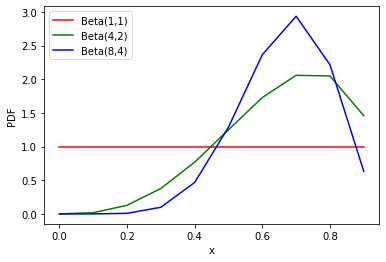

In [2]:
xs = np.arange(0, 1, step=0.1)
plt.plot(xs, stats.beta.pdf(xs, 1, 1), color="r", label="Beta(1,1)")
plt.plot(xs, stats.beta.pdf(xs, 4, 2), color="g", label="Beta(4,2)")
plt.plot(xs, stats.beta.pdf(xs, 8, 4), color="b", label="Beta(8,4)")
plt.xlabel("x")
plt.ylabel("PDF")
plt.legend(loc="best")
plt.show()

### 4. What is the prior probability at different points?

In [3]:
prior = stats.beta(8, 4)
prior_gt_25 = 1.0 - prior.cdf(0.25)
prior_gt_50 = 1.0 - prior.cdf(0.5)
prior_gt_80 = 1.0 - prior.cdf(0.8)
print("P(theta > 0.25): {:.5f}".format(prior_gt_25))
print("P(theta > 0.5): {:.5f}".format(prior_gt_50))
print("P(theta > 0.8): {:.5f}".format(prior_gt_80))

P(theta > 0.25): 0.99881
P(theta > 0.5): 0.88672
P(theta > 0.8): 0.16114


### 5. Posterior probability and credible 95% interval for first student

Student got 33 of 40 questions right, so our posterior will also be a Beta distribution (conjugate priors). The parameters for the posterior Beta distribution are as follows:

* $\alpha$ = 8 + 33 = 41
* $\beta$ = 4 + 40 - 33 = 11

In [4]:
posterior_1_mean = 41 / (41 + 11)
posterior_1_mle = 33 / 40
print("Prior Mean: {:.5f}".format(8/12))
print("Posterior Mean: {:.5f}".format(posterior_1_mean))
print("Posterior MLE:  {:.5f}".format(posterior_1_mle))

Prior Mean: 0.66667
Posterior Mean: 0.78846
Posterior MLE:  0.82500


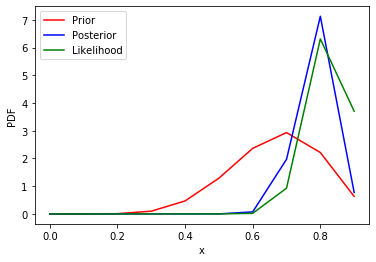

In [5]:
plt.plot(xs, stats.beta.pdf(xs, 8, 4), color="r", label="Prior")
plt.plot(xs, stats.beta.pdf(xs, 41, 11), color="b", label="Posterior")

# likelihood is discrete so needs to be plotted against integer values of x,
# also needs to be scaled (x44) so it can be plotted together with prior and posterior
xs_i = [int(x*40) for x in xs]
plt.plot(xs, 44*stats.binom.pmf(xs_i, 40, (33/40)), color="g", label="Likelihood")

plt.xlabel("x")
plt.ylabel("PDF")
plt.legend(loc="best")
plt.show()

In [6]:
posterior_1 = stats.beta(41, 11)
posterior_1_gt_25 = 1.0 - posterior_1.cdf(0.25)
posterior_1_gt_50 = 1.0 - posterior_1.cdf(0.5)
posterior_1_gt_80 = 1.0 - posterior_1.cdf(0.8)

posterior_1_95ci = (posterior_1.ppf(0.025), posterior_1.ppf(0.975))

print("P(theta_1 > 0.25): {:.5f}".format(posterior_1_gt_25))
print("P(theta_1 > 0.5): {:.5f}".format(posterior_1_gt_50))
print("P(theta_1 > 0.8): {:.5f}".format(posterior_1_gt_80))
print("95% credible interval: with 95% probability, theta_1 between {:.5f} and {:.5f}"
      .format(posterior_1_95ci[0], posterior_1_95ci[1]))

P(theta_1 > 0.25): 1.00000
P(theta_1 > 0.5): 0.99999
P(theta_1 > 0.8): 0.44440
95% credible interval: with 95% probability, theta_1 between 0.66884 and 0.88711


### 6. Posterior Probability and 95% credible interval for second student

Student got 24 of 40 questions right, so our posterior will also be a Beta distribution (conjugate priors). The parameters for the posterior Beta distribution are as follows:

* $\alpha$ = 8 + 24 = 32
* $\beta$ = 4 + 40 - 24 = 20

In [7]:
posterior_2_mean = 32 / (32 + 20)
posterior_2_mle = 24 / 40
print("Prior Mean: {:.5f}".format(8/12))
print("Posterior Mean: {:.5f}".format(posterior_2_mean))
print("Posterior MLE:  {:.5f}".format(posterior_2_mle))

Prior Mean: 0.66667
Posterior Mean: 0.61538
Posterior MLE:  0.60000


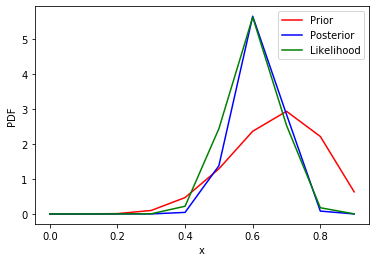

In [8]:
plt.plot(xs, stats.beta.pdf(xs, 8, 4), color="r", label="Prior")
plt.plot(xs, stats.beta.pdf(xs, 32, 20), color="b", label="Posterior")

# likelihood is discrete so needs to be plotted against integer values of x,
# also needs to be scaled (x44) so it can be plotted together with prior and posterior
xs_i = [int(x*40) for x in xs]
plt.plot(xs, 44*stats.binom.pmf(xs_i, 40, (24/40)), color="g", label="Likelihood")

plt.xlabel("x")
plt.ylabel("PDF")
plt.legend(loc="best")
plt.show()

In [9]:
posterior_2 = stats.beta(32, 20)
posterior_2_gt_25 = 1.0 - posterior_2.cdf(0.25)
posterior_2_gt_50 = 1.0 - posterior_2.cdf(0.5)
posterior_2_gt_80 = 1.0 - posterior_2.cdf(0.8)

posterior_2_95ci = (posterior_2.ppf(0.025), posterior_2.ppf(0.975))

print("P(theta_1 > 0.25): {:.5f}".format(posterior_2_gt_25))
print("P(theta_1 > 0.5): {:.5f}".format(posterior_2_gt_50))
print("P(theta_1 > 0.8): {:.5f}".format(posterior_2_gt_80))
print("95% credible interval: with 95% probability, theta_1 between {:.5f} and {:.5f}"
      .format(posterior_2_95ci[0], posterior_2_95ci[1]))

P(theta_1 > 0.25): 1.00000
P(theta_1 > 0.5): 0.95404
P(theta_1 > 0.8): 0.00125
95% credible interval: with 95% probability, theta_1 between 0.48080 and 0.74156


### 7. Compare posterior probabilities for the two students

This is difficult to do analytically, so we will do this by simulation.

In [10]:
posterior_1_sim = posterior_1.rvs(1000)
posterior_2_sim = posterior_2.rvs(1000)
print("Empirical probability that theta_2 > theta_1: {:.3f}".format(
    np.mean(posterior_1_sim > posterior_2_sim)))

Empirical probability that theta_2 > theta_1: 0.976


### References

* [Bayesian Inference of a Binomial Proportion - the Analytical Approach](https://www.quantstart.com/articles/Bayesian-Inference-of-a-Binomial-Proportion-The-Analytical-Approach/) -- covers Binomial likelihood and the idea of Beta conjugate priors, coverage similar to course material.